In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

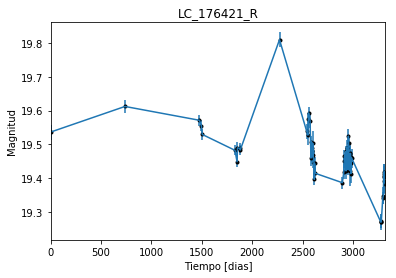

In [2]:
data = np.genfromtxt('LC_176421_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176421_R')
plt.savefig("LC_176421_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

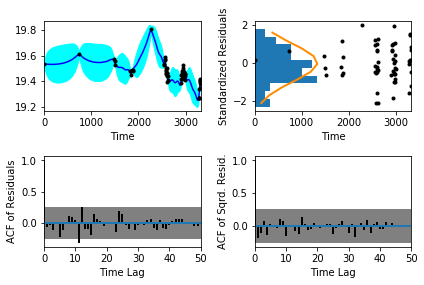

In [5]:
sample.assess_fit()

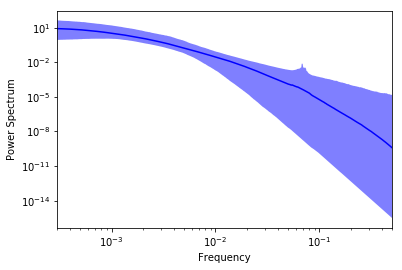

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

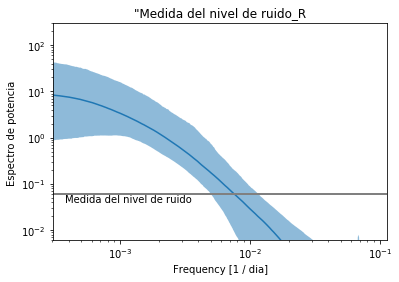

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176421_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176421_R')

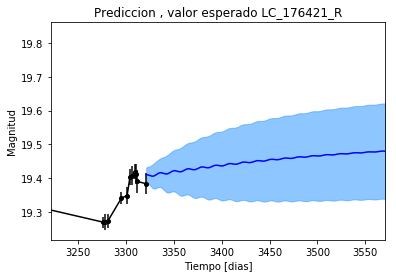

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176421_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176421_R')

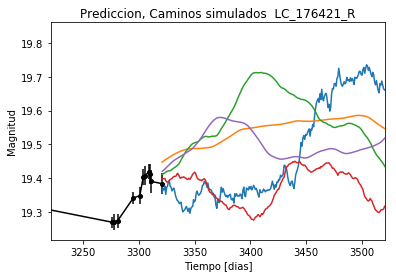

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176421_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


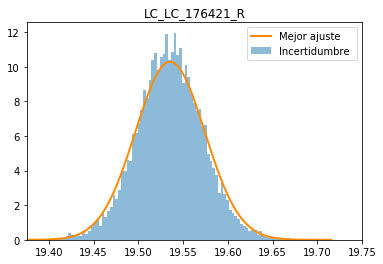

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_LC_176421_R')
plt.savefig("Mejor_ajuste_LC_176421_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176421_R')

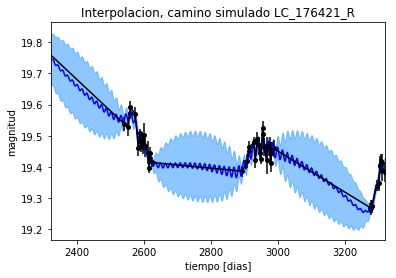

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_R')

Text(0.5,1,'Interpolacion, camino simulado LC_176421_R')

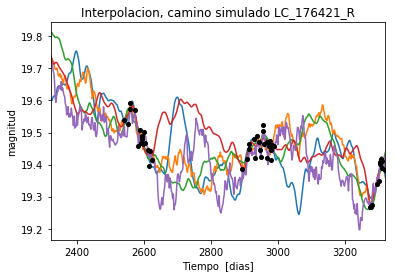

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1430.07409445
Median: 0.0233445506966
Standard deviation: 0.197324979475
68% credibility interval: [ 0.00143392  0.2312508 ]
95% credibility interval: [  3.71732170e-04   7.61146783e-01]
99% credibility interval: [  3.01583364e-04   9.51237554e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 590.641829354
Median: 0.00396091001021
Standard deviation: 0.117166899505
68% credibility interval: [ 0.00060229  0.06141287]
95% credibility interval: [  3.26598271e-04   4.19992565e-01]
99% credibility interval: [  3.01583364e-04   7.56471588e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 527.133234672
Median: 0.0362464953634


In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 496.237040119
Median: 132.337080925
Standard deviation: 1.9411936748
68% credibility interval: [ 130.34458303  133.75298861]
95% credibility interval: [ 127.68971349  135.69638966]
99% credibility interval: [ 125.76366125  137.37266466]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 533.864707804
Median: 0.959373404144
Standard deviation: 2.39228848622
68% credibility interval: [ 0.09492194  4.3917361 ]
95% credibility interval: [ 0.02467969  8.18201332]
99% credibility interval: [  0.01371125  11.4694315 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 562.467035144
Median: 0.972193424393
Standard deviation: 10.3686900404
68% credibility interval: [  0.07438309  12.03686555]
95% credibility interval: [  3.1785843

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2928.70435972
Median: 1.46918017149e-20
Standard deviation: 5.63570540503e+87
68% credibility interval: [  9.94498710e-61   4.22356949e-01]
95% credibility interval: [  6.12248778e-172   3.43227570e+063]
99% credibility interval: [  6.22061131e-177   9.28451152e+077]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2019.45619729
Median: 19.5207734312
Standard deviation: 0.0716234484169
68% credibility interval: [ 19.45937294  19.58083111]
95% credibility interval: [ 19.37661701  19.67066741]
99% credibility interval: [ 19.30611031  19.73688489]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 811.991133717
Median: 0.0615318411723
Standard deviation: 0.258769578163
68% credibility interval: [ 0.          0.44431029]
95% credibility interval: [ 0.          0.90314881]
99% credibility interval: [ 0.          0.97864277]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 811.991133717
Median: 0.0615318411723
Standard deviation: 0.258769578163
68% credibility interval: [ 0.          0.44431029]
95% credibility interval: [ 0.          0.90314881]
99% credibility interval: [ 0.          0.97864277]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1205.90370422
Median: 0.0
Standard deviation: 0.000665268480081
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 496.237040119
Median: 132.337080925
Standard deviation: 1.9411936748
68% credibility interval: [ 130.34458303  133.75298861]
95% credibility interval: [ 127.68971349  135.69638966]
99% credibility interval: [ 125.76366125  137.37266466]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2142.72714424
Median: 0.023465251983
Standard deviation: 0.0245793775897
68% credibility interval: [ 0.01389216  0.04239635]
95% credibility interval: [ 0.00937449  0.08678951]
99% credibility interval: [ 0.00735663  0.14949999]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 839.589663199
Median: 1.09969918868
Standard deviation: 0.202556535536
68% credibility interval: [ 0.91557152  1.3071855 ]
95% credibility interval: [ 0.77161177  1.56584851]
99% credibility interval: [ 0.67406382  1.74838581]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 891.605655595
Median: 0.00076091897385
Standard deviation: 0.162789771759
68% credibility interval: [  4.92709968e-06   2.64090602e-02]
95% credibility interval: [  1.56545943e-67   3.52075860e-01]
99% credibility interval: [  7.39809594e-82   1.21994274e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1430.07409445
Median: (-0.146678137939+0j)
Standard deviation: 2.04468058937
68% credibility interval: [-1.45299163+0.j         -0.00900959-0.08730147j]
95% credibility interval: [ -4.78242628e+00+0.j          -2.33566211e-03-0.38307077j]
99% credibility interval: [ -5.97680182e+00+0.j          -1.89490416e-03-0.43097012j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 590.641829354
Median: (-0.0248871315792+2.15679465664j)
Standard deviation: 1.78479822662
68% credibility interval: [-0.38586843+2.82443922j -0.00378433+0.06098806j]
95% credibility interval: [ -2.63889111e+00+6.3071701j  -2.05207746e-03+0.j       ]
99% credibility interval: [ -4.75305116e+00+3.46319603j  -1.89490416e-03+0.43097012j]
Posterior summary f